In [2]:
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
import datetime
import math

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# cokie laptop
dataPath = "C:\\Users\\cokie\\Workspace\\GithubProjects\\MLPlay\\data\\"

In [3]:
quartic_weights = [-0.5, 1, 0.7, 0.2, 1]
quartic_name = "-0.5x^4 + x^3 + 0.7x^2 + 0.2x + 1"

# Set training params
targetTrainSize = 1000
ratioOfTest = 0.1
totalGenSize = math.floor(targetTrainSize / (1 - ratioOfTest))
trainSize = math.floor(totalGenSize * (1 - ratioOfTest))
testSize = math.floor(totalGenSize * ratioOfTest)
noise_std = 0.5
epochs = 500

In [4]:
# define the ground truth function
def quartic_func(in_val, weights=quartic_weights):
    powers = np.array([4, 3, 2, 1])
    in_vals = np.array([in_val, in_val, in_val, in_val])

    out_val = np.sum( np.power(in_vals, powers) * (weights[:4]) ) + weights[-1]
    
    return out_val


def sample(n, domain_start=0, domain_end=1, noise_std=0.2, function=quartic_func, weights=quartic_weights):
    random.seed(2525)
    dom_arr = []
    range_arr = []

    for n in range(n-1):
        dom_val = (random.random() * (domain_end - domain_start)) + domain_start
        dom_val = dom_val + (random.gauss(0, noise_std))

        range_val = function(dom_val, weights)
        range_val = range_val + (random.gauss(0, noise_std))


        if ((dom_val < domain_end) and (dom_val >= domain_start)):
            dom_arr.append(dom_val)
            range_arr.append(range_val)

    return [dom_arr, range_arr]

[-0.5, 1, 0.7, 0.2, 1]


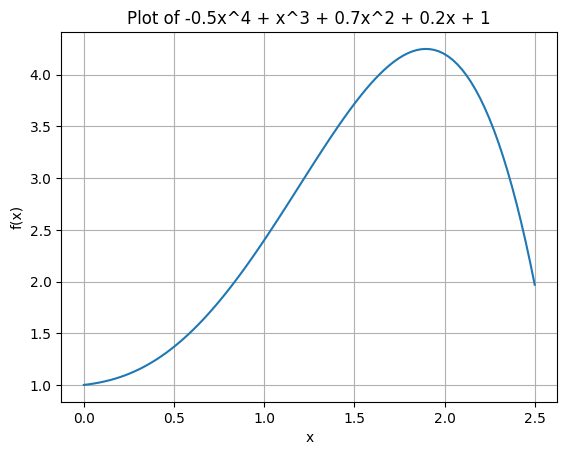

In [5]:
# plot the underlying quartic function and the generated samples
x = np.linspace(0, 2.5, 100)

def quartic_func_bulk(in_arr, weights=quartic_weights):
    y = map(quartic_func, in_arr, [weights]*len(in_arr))
    y = np.array(list(y))
    return y

plt.plot( x, quartic_func_bulk(x, quartic_weights) )
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of ' + quartic_name)
plt.grid(True)
plt.xscale('linear')
print(quartic_weights)
plt.show()

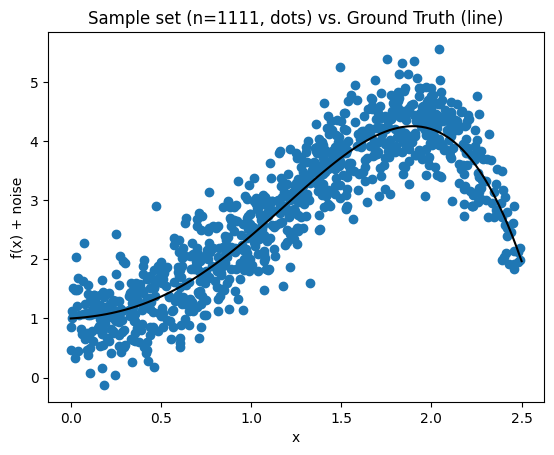

In [6]:
sampleset = sample(totalGenSize, domain_start=0, domain_end=2.5, noise_std=noise_std, function=quartic_func)
model_input = sampleset[0]
labels = sampleset[1]

plt.scatter( model_input, labels )
plt.plot( x, quartic_func_bulk(x, quartic_weights), color='black' )
plt.xlabel("x")
plt.ylabel("f(x) + noise")
plt.title("Sample set (n=" + str(totalGenSize) + ", dots) vs. Ground Truth (line)")

plt.show()

In [7]:
with open(dataPath + "polynomial00_X.txt", 'w+') as f:
    # write elements of list
    for items in model_input:
        f.write('%s\n' %items)

with open(dataPath + "polynomial00_Y.txt", 'w+') as f:
    # write elements of list
    for items in labels:
        f.write('%s\n' %items)

list